Processing category: AnnualCrop (train)...


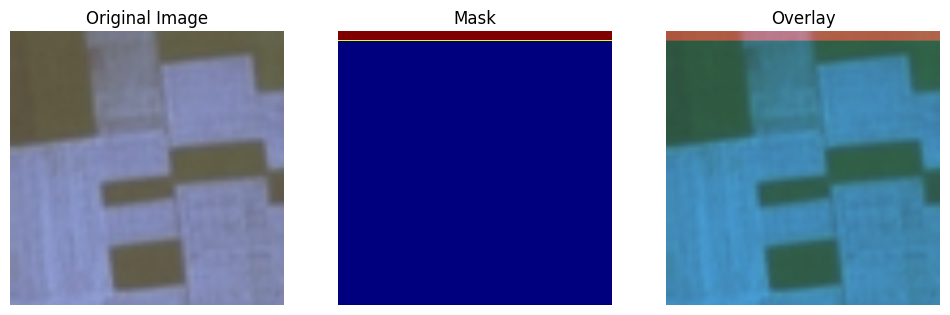

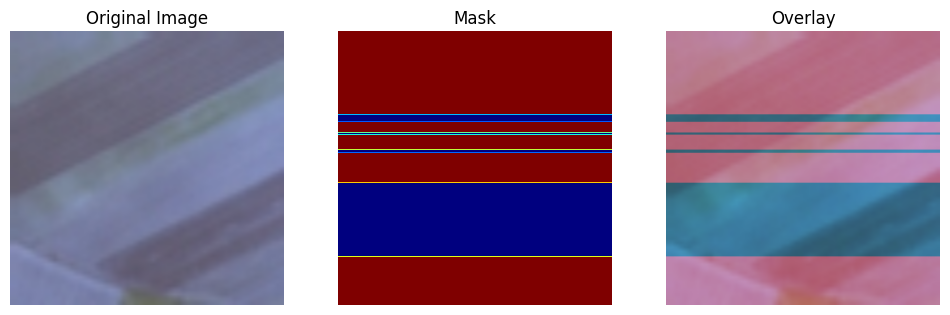

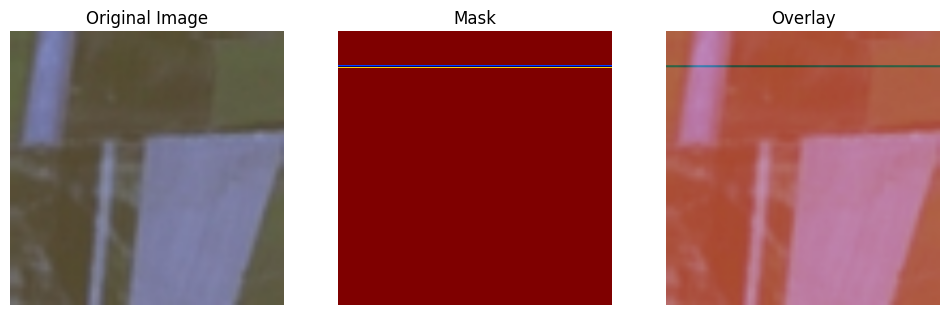

/tmp/ipykernel_57801/1632296323.py:50: RuntimeWarning: invalid value encountered in divide
  overlay_image[..., 0] = (overlay_image[..., 0] * 0.5 + mask_resized / mask_resized.max() * 255 * 0.5).astype(np.uint8)
/tmp/ipykernel_57801/1632296323.py:50: RuntimeWarning: invalid value encountered in cast
  overlay_image[..., 0] = (overlay_image[..., 0] * 0.5 + mask_resized / mask_resized.max() * 255 * 0.5).astype(np.uint8)


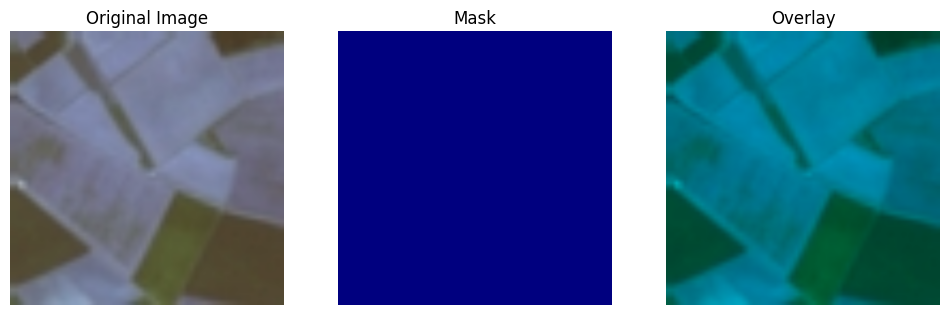

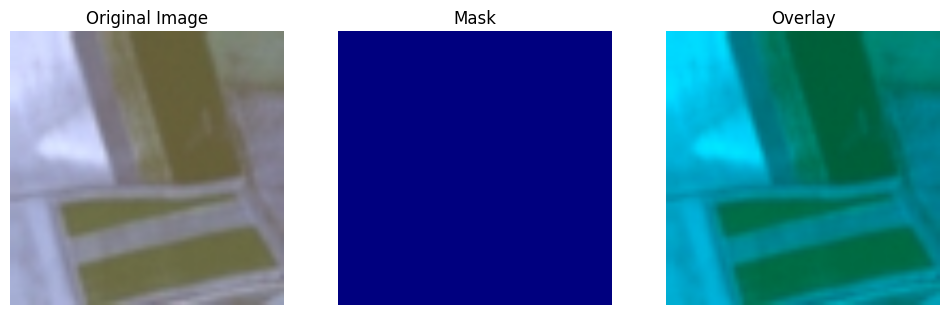

Processing category: Forest (train)...


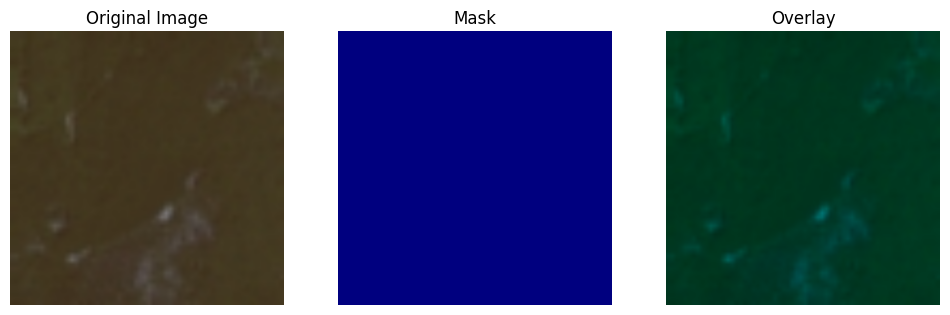

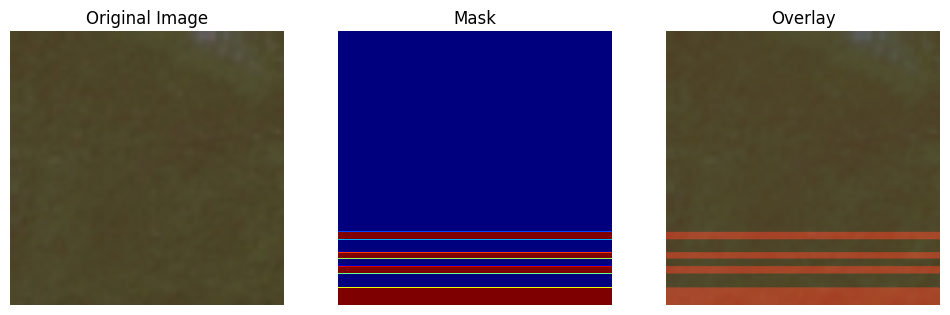

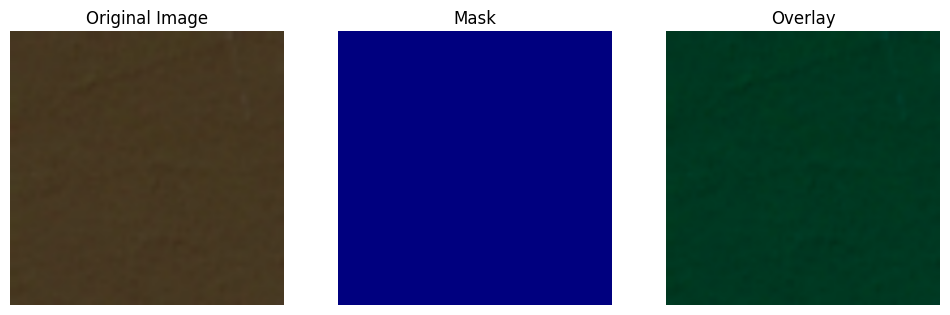

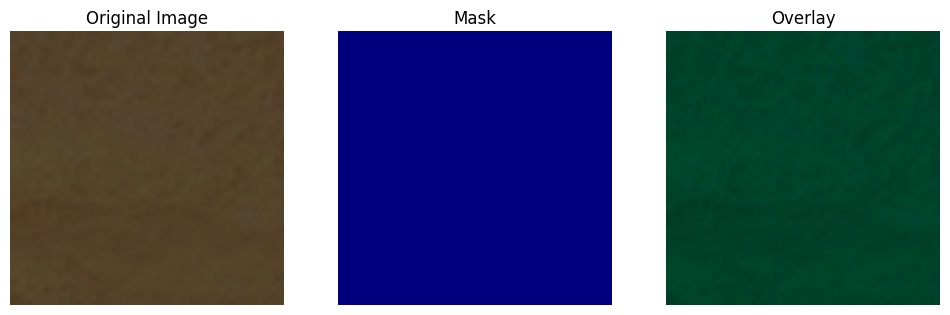

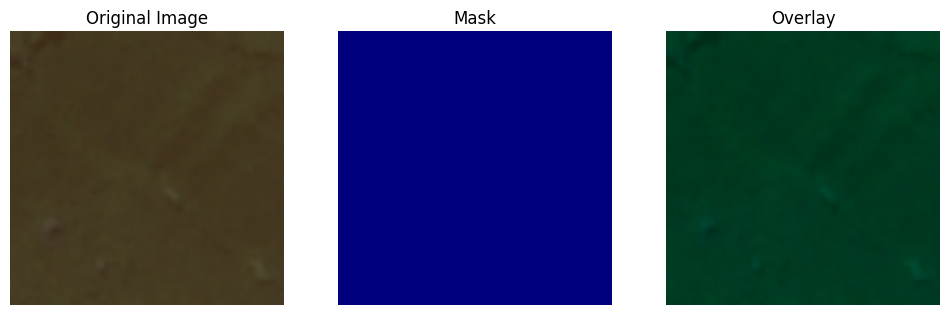

Processing category: HerbaceousVegetation (train)...


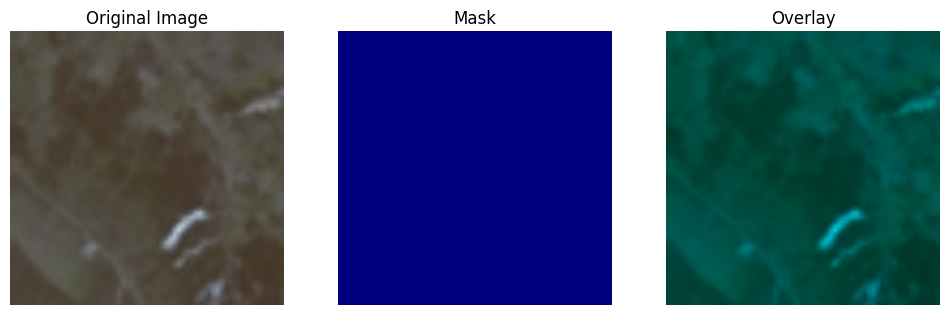

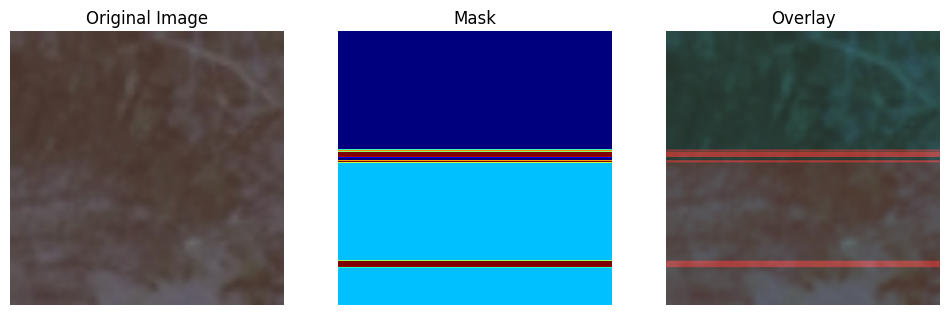

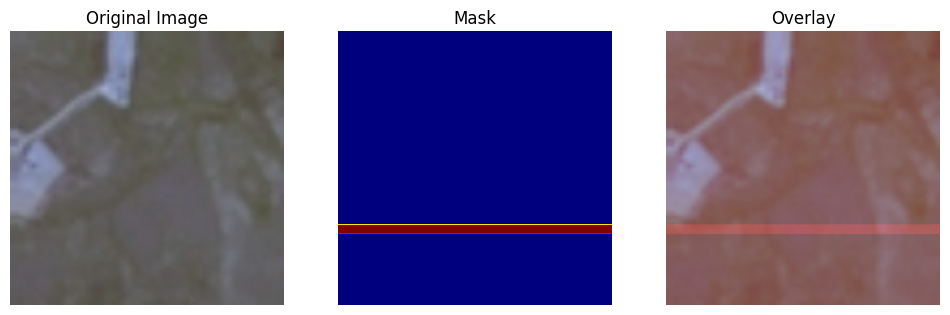

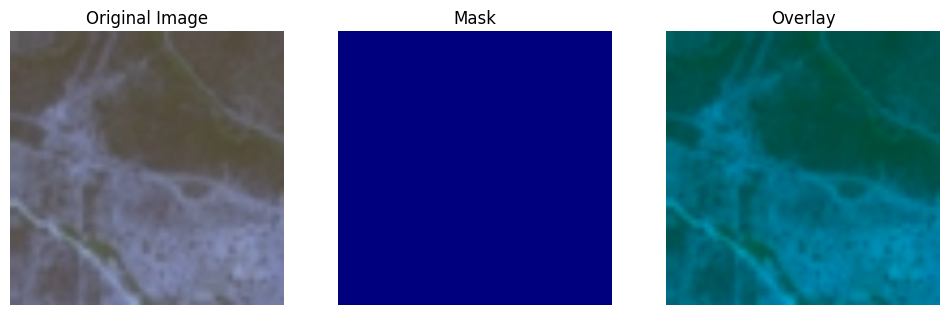

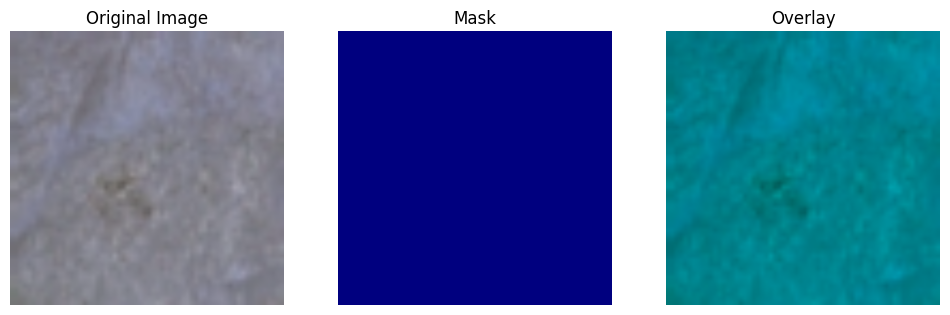

Processing category: Highway (train)...


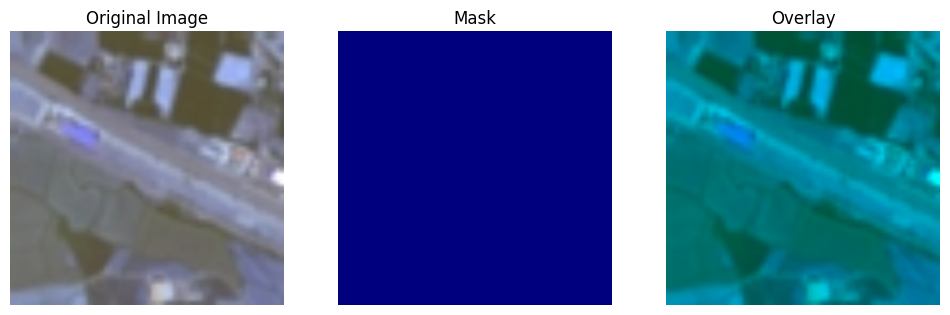

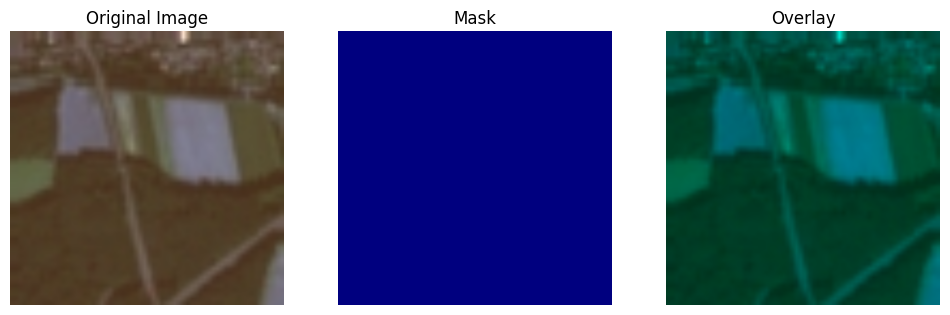

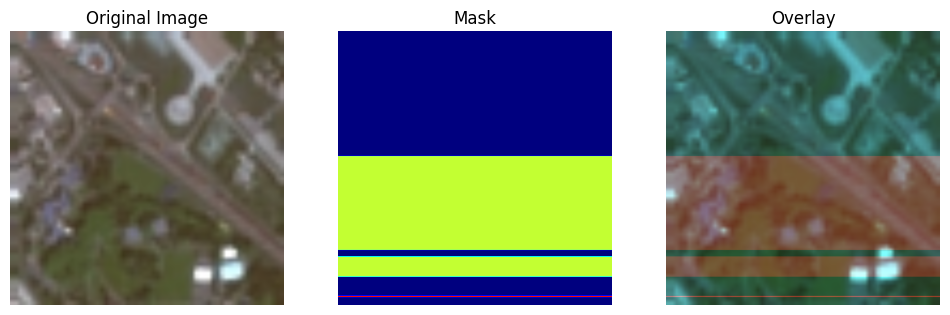

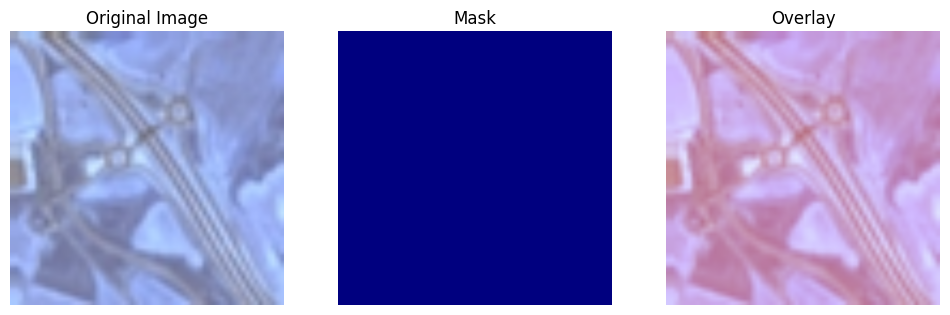

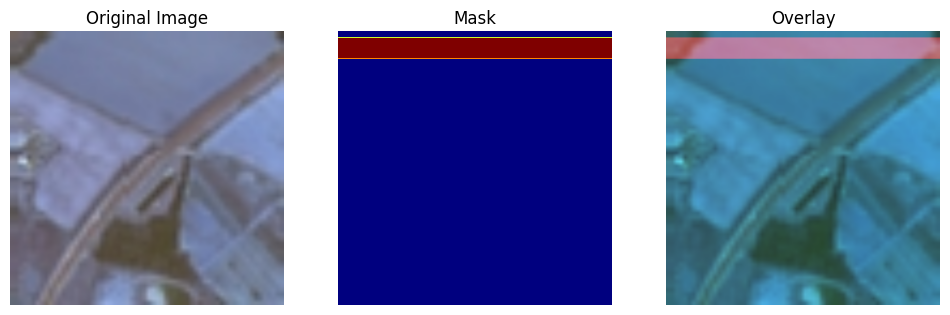

Processing category: Industrial (train)...


In [ ]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import cv2  # Ensure OpenCV is installed
import gc  # Garbage collection

# Paths
training_data_dir = "../data/training_data"
categories = ["AnnualCrop", "Forest", "HerbaceousVegetation", "Highway", "Industrial", "Residential"]

# Number of samples to visualize
num_samples = 5

# Function to load data
def load_data(training_data_dir, category, split):
    # Construct paths based on split
    image_path = os.path.join(training_data_dir, split, f"{category}_{split}.npy")
    mask_path = os.path.join(training_data_dir, split, f"{category}_{split}_masks_combined.npy")
    
    # Check if files exist
    if not os.path.exists(image_path) or not os.path.exists(mask_path):
        print(f"Missing files for {category} ({split}). Skipping...")
        return None, None
    
    # Load image and mask data
    images = np.load(image_path)
    masks = np.load(mask_path)
    return images, masks

# Function to sample and visualize data
def sample_and_visualize(images, masks, num_samples):
    indices = random.sample(range(images.shape[0]), num_samples)
    for i in indices:
        image = images[i]
        mask = masks[i]
        
        # Normalize image for visualization
        if image.max() <= 1.0:
            image = (image * 255).astype(np.uint8)
        
        # Decode mask to class labels
        mask_class = np.argmax(mask, axis=-1)
        
        # Resize mask to match image
        mask_resized = cv2.resize(mask_class, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)
        
        # Overlay mask on image
        overlay_image = image.copy()
        overlay_image[..., 0] = (overlay_image[..., 0] * 0.5 + mask_resized / mask_resized.max() * 255 * 0.5).astype(np.uint8)
        
        # Plot
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 3, 1)
        plt.imshow(image)
        plt.title("Original Image")
        plt.axis("off")
        plt.subplot(1, 3, 2)
        plt.imshow(mask_resized, cmap="jet")
        plt.title("Mask")
        plt.axis("off")
        plt.subplot(1, 3, 3)
        plt.imshow(overlay_image)
        plt.title("Overlay")
        plt.axis("off")
        plt.show()
        plt.close("all") 

# Function to combine all splits
def combine_splits(training_data_dir, categories, split):
    X, Y = [], []
    for category in categories:
        images, masks = load_data(training_data_dir, category, split)
        if images is not None and masks is not None:
            X.append(images)
            Y.append(masks)
    if X and Y:
        return np.concatenate(X, axis=0), np.concatenate(Y, axis=0)
    return None, None

# Main function
def main():
    # Sample and visualize a few images
    for category in categories:
        print(f"Processing category: {category} (train)...")
        images, masks = load_data(training_data_dir, category, "train")
        if images is not None and masks is not None:
            sample_and_visualize(images, masks, num_samples)
        del images, masks
        gc.collect()

    # Combine datasets
    print("Combining datasets...")
    X_train, Y_train = combine_splits(training_data_dir, categories, "train")
    X_val, Y_val = combine_splits(training_data_dir, categories, "val")
    X_test, Y_test = combine_splits(training_data_dir, categories, "test")

    # Check final dataset shapes
    if X_train is not None and Y_train is not None:
        print(f"Train Dataset: Images={X_train.shape}, Masks={Y_train.shape}")
    if X_val is not None and Y_val is not None:
        print(f"Validation Dataset: Images={X_val.shape}, Masks={Y_val.shape}")
    if X_test is not None and Y_test is not None:
        print(f"Test Dataset: Images={X_test.shape}, Masks={Y_test.shape}")

# Entry point
if __name__ == "__main__":
    main()
